<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/retention_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

In [14]:
#представим данные в виду датафрэйма
df = pd.read_excel('orders_2019 only.xlsx')
df.head()

,Номер Заказа,Дата и время заказа,дата заказа,year,quarter,month,week,Статус заказа,G2N,Курьерская компания,Courier,Delivery Method,prepaid/COD,prepaid flag,выбранная дата и время получения заказа,адрес доставки,Почтовый индекс,город,область,ФО,ОЦ,Delivery Refund,Delivery Cost by L'Oreal w/o VAT,ФИО клиента,email,телефон клиента,примененный купон,Аэрофлот,"ЦЕНА ДО СКИДКИ SUM, RUR","ЦЕНА ПОСЛЕ СКИДКИ SUM, RUR",СКИДКА В РУБЛЯХ ПОЛНАЯ,СКИДКА ЗА ОПЛАТУ ОНЛАЙН в рублях,участник ПЛ,"СКИДКА ЗА СПИСАННЫЕ БАЛЛЫ ПЛ, в рублях","СКИДКА ЗА ИСПОЛЬЗОВАННЫЙ СЕРТИФИКАТ, в рублях","СКИДКА ЗА ОКРУГЛЕНИЕ, в рублях"
0,131855779,2019-01-01 04:16:01,2019-01-01,2019,1,1,1,complete,1,Пункт самовывоза — PickPoint,PickPoint,pickup,prepaid,1,2019-01-09 03:00:00,"ул. Карла Маркса, 107",NaN,Красково,Московская обл.,МО,областной центр,312.0,260.0,Георгий Алексеев,alekseev.gm@yandex.ru,+7 (909) 939-98-91,NaN,NaN,1348.3300,1307.5,40.8300,40.4499,1,0.0,0.0,0.3801
1,131855782,2019-01-01 06:43:59,2019-01-01,2019,1,1,1,complete,1,Пункт самовывоза — PickPoint,PickPoint,pickup,prepaid,1,2019-01-10 03:00:00,"ул. Ленинградская, 134",NaN,Воронеж,Воронежская обл.,ЦФО,областной центр,0.0,280.0,Наталья Егорушина,5reasons@mail.ru,+7 (950) 760-75-59,NaN,NaN,3862.8890,3862.5,0.3890,0.0000,1,0.0,0.0,0.3900
2,131855786,2019-01-01 10:35:21,2019-01-01,2019,1,1,1,canceled,0,Почта России,Rus Post,post,prepaid,1,2019-01-14 03:00:00,"ул. Советская, 30",396702.0,Новомарковка,Воронежская обл.,ЦФО,областной центр,0.0,NaN,Петренка Светлана Евгеньевна,sveta.petrenko36@mail.ru,+7 (920) 432-89-05,NaN,NaN,6616.6700,5082.5,1534.1700,157.1997,1,1200.0,0.0,0.2903
3,131855787,2019-01-01 11:05:09,2019-01-01,2019,1,1,1,complete,1,Пункт самовывоза — PickPoint,PickPoint,pickup,prepaid,1,2019-01-10 03:00:00,"Бульвар Победы, 24",NaN,Воронеж,Воронежская обл.,ЦФО,областной центр,0.0,280.0,Виктор Широкожухов,vialex0804@yandex.ru,+7 (903) 852-28-28,NaN,NaN,9621.6600,4580.0,5041.6600,141.6504,1,4720.0,0.0,0.0296
4,131855789,2019-01-01 11:37:26,2019-01-01,2019,1,1,1,complete,1,Курьерская доставка — DPD,DPD/SPSR,courier,COD,0,2019-01-23 03:00:00,Ленина 60 кв. 54,369140.0,Зеленчукская,Карачаево-Черкесская респ.,СКФО,областной центр,0.0,NaN,Сусанна Доттаева,susannadottaeva@icloud.com,+7 (918) 715-14-55,NaN,NaN,2901.5645,2465.0,436.5645,0.0000,1,365.0,0.0,0.7300


In [15]:
data = df[['Номер Заказа', 'дата заказа', 'ФИО клиента', 'email', 'ЦЕНА ДО СКИДКИ SUM, RUR']]
data

,Номер Заказа,дата заказа,ФИО клиента,email,"ЦЕНА ДО СКИДКИ SUM, RUR"
0,131855779,2019-01-01,Георгий Алексеев,alekseev.gm@yandex.ru,1348.3300
1,131855782,2019-01-01,Наталья Егорушина,5reasons@mail.ru,3862.8890
2,131855786,2019-01-01,Петренка Светлана Евгеньевна,sveta.petrenko36@mail.ru,6616.6700
3,131855787,2019-01-01,Виктор Широкожухов,vialex0804@yandex.ru,9621.6600
4,131855789,2019-01-01,Сусанна Доттаева,susannadottaeva@icloud.com,2901.5645
...,...,...,...,...,...
70559,132312703,2019-12-31,Никита Куликов,nixon39@mail.ru,4427.0544
70560,132312709,2019-12-31,Зарина Галазова,Shery22@mail.ru,3066.6800
70561,132312712,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000
70562,132312722,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70564 entries, 0 to 70563
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Номер Заказа             70564 non-null  object        
 1   дата заказа              70564 non-null  datetime64[ns]
 2   ФИО клиента              70564 non-null  object        
 3   email                    70564 non-null  object        
 4   ЦЕНА ДО СКИДКИ SUM, RUR  70564 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.7+ MB


In [17]:
data['ID'] = data['email'].astype('category').cat.codes 
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Номер Заказа,дата заказа,ФИО клиента,email,"ЦЕНА ДО СКИДКИ SUM, RUR",ID
0,131855779,2019-01-01,Георгий Алексеев,alekseev.gm@yandex.ru,1348.3300,5811
1,131855782,2019-01-01,Наталья Егорушина,5reasons@mail.ru,3862.8890,903
2,131855786,2019-01-01,Петренка Светлана Евгеньевна,sveta.petrenko36@mail.ru,6616.6700,37821
3,131855787,2019-01-01,Виктор Широкожухов,vialex0804@yandex.ru,9621.6600,41468
4,131855789,2019-01-01,Сусанна Доттаева,susannadottaeva@icloud.com,2901.5645,37670
...,...,...,...,...,...,...
70559,132312703,2019-12-31,Никита Куликов,nixon39@mail.ru,4427.0544,30178
70560,132312709,2019-12-31,Зарина Галазова,Shery22@mail.ru,3066.6800,4164
70561,132312712,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000,19653
70562,132312722,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000,19653


In [18]:
data.ID.nunique()

44270

In [19]:
data.ID.value_counts()

13890    126
17544     49
2528      28
27333     25
28319     24
        ... 
32617      1
26474      1
28523      1
24429      1
0          1
Name: ID, Length: 44270, dtype: int64

In [32]:
mn = data.rename(columns={"Номер Заказа": "order", "дата заказа": "order_date",  "ФИО клиента": "customer",  "ЦЕНА ДО СКИДКИ SUM, RUR": "price",  "B": "c"})
mn

,order,order_date,customer,email,price,ID
0,131855779,2019-01-01,Георгий Алексеев,alekseev.gm@yandex.ru,1348.3300,5811
1,131855782,2019-01-01,Наталья Егорушина,5reasons@mail.ru,3862.8890,903
2,131855786,2019-01-01,Петренка Светлана Евгеньевна,sveta.petrenko36@mail.ru,6616.6700,37821
3,131855787,2019-01-01,Виктор Широкожухов,vialex0804@yandex.ru,9621.6600,41468
4,131855789,2019-01-01,Сусанна Доттаева,susannadottaeva@icloud.com,2901.5645,37670
...,...,...,...,...,...,...
70559,132312703,2019-12-31,Никита Куликов,nixon39@mail.ru,4427.0544,30178
70560,132312709,2019-12-31,Зарина Галазова,Shery22@mail.ru,3066.6800,4164
70561,132312712,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000,19653
70562,132312722,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000,19653


In [26]:
mn['ID'] = mn['ID'].astype(int)




Then, we calculate an aggregate metric indicating how many orders were placed by each customer.


In [27]:
n_orders = mn.groupby(['ID'])['order'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / mn['ID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

29.65% of customers ordered more than once.


Using the code above, we can state that 29.65% of customers ordered more than once. This is already a valuable piece of information, as is seems that the customers are placing multiple orders. This means that there will be at least some retention.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Additionally, we look at the distribution of the number of orders per customer. For that, we can reuse the previously aggregated data (n_orders) and plot the data on a histogram.

There are some infrequent cases of customers, who ordered more than 20 times.

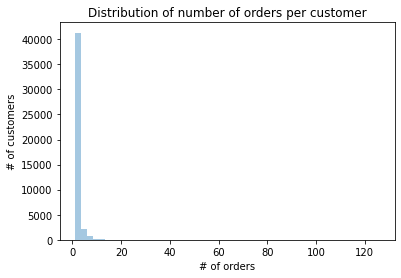

In [30]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

Cohort Analysis

In [34]:
mn['order_month'] = mn['order_date'].dt.to_period('M')
mn['cohort'] = mn.groupby('ID')['order_date'] \
                 .transform('min') \
                 .dt.to_period('M') 

mn

,order,order_date,customer,email,price,ID,order_month,cohort
0,131855779,2019-01-01,Георгий Алексеев,alekseev.gm@yandex.ru,1348.3300,5811,2019-01,2019-01
1,131855782,2019-01-01,Наталья Егорушина,5reasons@mail.ru,3862.8890,903,2019-01,2019-01
2,131855786,2019-01-01,Петренка Светлана Евгеньевна,sveta.petrenko36@mail.ru,6616.6700,37821,2019-01,2019-01
3,131855787,2019-01-01,Виктор Широкожухов,vialex0804@yandex.ru,9621.6600,41468,2019-01,2019-01
4,131855789,2019-01-01,Сусанна Доттаева,susannadottaeva@icloud.com,2901.5645,37670,2019-01,2019-01
...,...,...,...,...,...,...,...,...
70559,132312703,2019-12-31,Никита Куликов,nixon39@mail.ru,4427.0544,30178,2019-12,2019-12
70560,132312709,2019-12-31,Зарина Галазова,Shery22@mail.ru,3066.6800,4164,2019-12,2019-05
70561,132312712,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000,19653,2019-12,2019-12
70562,132312722,2019-12-31,Мартышина Наталья,kater_2017@bk.ru,2112.5000,19653,2019-12,2019-12


In [37]:
mn_cohort = mn.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('ID', 'nunique')) \
              .reset_index(drop=False)
mn_cohort['period_number'] = (mn_cohort.order_month - mn_cohort.cohort).apply(attrgetter('n'))
mn_cohort

,cohort,order_month,n_customers,period_number
0,2019-01,2019-01,4850,0
1,2019-01,2019-02,557,1
2,2019-01,2019-03,538,2
3,2019-01,2019-04,518,3
4,2019-01,2019-05,491,4
...,...,...,...,...
73,2019-10,2019-11,386,1
74,2019-10,2019-12,220,2
75,2019-11,2019-11,6356,0
76,2019-11,2019-12,369,1


In [40]:
cohort_pivot = mn_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

#cohort_pivot

In [41]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

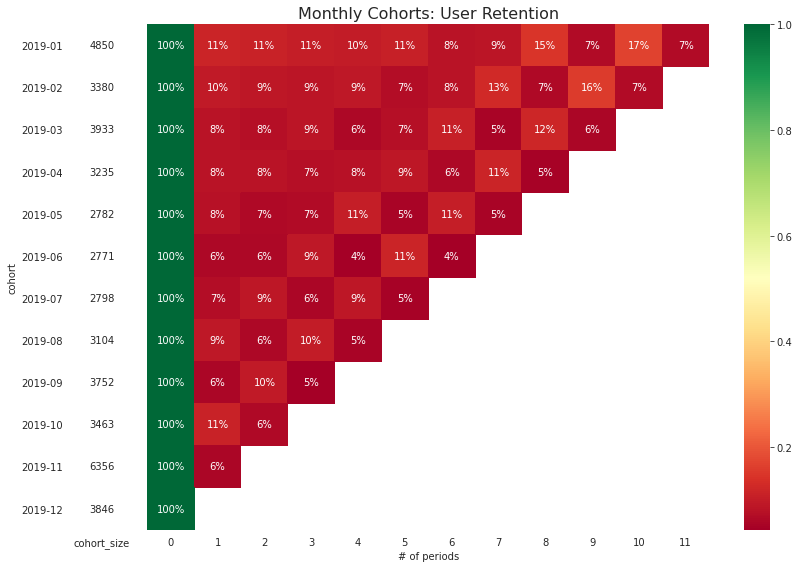

In [42]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()